In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
print('tf.__version__=',tf.__version__)

tf.__version__= 2.2.0


In [2]:
train_datasets = np.load('/home/junkai/3D_v1.0/202008092123train_dataset.npz')
X = train_datasets[train_datasets.files[0]]
Y = train_datasets[train_datasets.files[1]]

In [3]:
from sklearn.model_selection import train_test_split
test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
print(np.shape(x_train))
print(np.shape(x_test))

(288480, 10, 10, 10)
(72120, 10, 10, 10)


In [4]:
img_x, img_y ,img_z = X.shape[1], X.shape[2],X.shape[3]
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(img_x, img_y ,img_z)),
    keras.layers.Dense(10, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.summary(line_length=None, positions=None, print_fn=None)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10010     
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 10,021
Trainable params: 10,021
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
#SparseCategoricalCrossentropy(#from_logits=True)

In [7]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=20,batch_size=32)
print(history.history.keys())

Epoch 1/20
9015/9015 [==============================] - 17s 2ms/step - loss: 0.6077 - accuracy: 0.6775 - val_loss: 0.5992 - val_accuracy: 0.6909
Epoch 2/20
9015/9015 [==============================] - 17s 2ms/step - loss: 0.5968 - accuracy: 0.6814 - val_loss: 0.5882 - val_accuracy: 0.6915
Epoch 3/20
9015/9015 [==============================] - 17s 2ms/step - loss: 0.5937 - accuracy: 0.6841 - val_loss: 0.5922 - val_accuracy: 0.6911
Epoch 4/20
9015/9015 [==============================] - 17s 2ms/step - loss: 0.5912 - accuracy: 0.6839 - val_loss: 0.5851 - val_accuracy: 0.6925
Epoch 5/20
9015/9015 [==============================] - 17s 2ms/step - loss: 0.5892 - accuracy: 0.6857 - val_loss: 0.5864 - val_accuracy: 0.6925
Epoch 6/20
9015/9015 [==============================] - 17s 2ms/step - loss: 0.5883 - accuracy: 0.6864 - val_loss: 0.5869 - val_accuracy: 0.6928
Epoch 7/20
9015/9015 [==============================] - 17s 2ms/step - loss: 0.5869 - accuracy: 0.6870 - val_loss: 0.5782 - val_ac

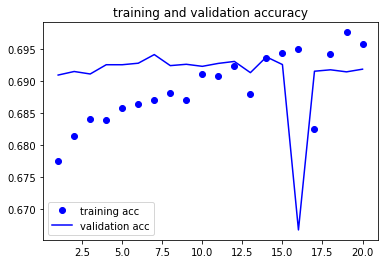

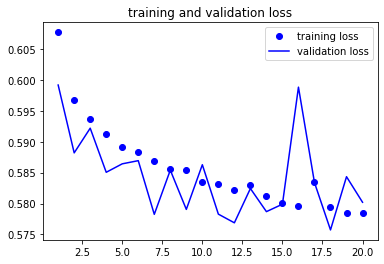

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc, 'bo',label='training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss, 'bo',label='training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

In [9]:
model.save('20200815model.h5')